# Кейс 3. Прогнозирование конверсии пользователя в первую подписку из пробного периода

## Первичный анализ

### Импорт библиотек

In [4]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

### Загрузка данных

In [6]:
# загрузка файла
df = pd.read_csv("videostreaming_platform.csv")

# данные для первичного анализа
print("============== Информация о датасете =============")
display(df.info())
print("=============== 25 случайных строк ===============")
display(df.sample(25))

============== Информация о датасете =============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                28000 non-null  object 
 1   start_trial_date       28000 non-null  object 
 2   city                   27692 non-null  object 
 3   device                 28000 non-null  object 
 4   source                 28000 non-null  object 
 5   favourite_genre        20048 non-null  object 
 6   avg_min_watch_daily    28000 non-null  float64
 7   number_of_days_logged  28000 non-null  int64  
 8   churn                  28000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


None

=============== 25 случайных строк ===============


,user_id,start_trial_date,city,device,source,favourite_genre,avg_min_watch_daily,number_of_days_logged,churn
303,aefad363-080e-47f5-b79f-239a8649145e,2024-02-01,Yekaterinburg,web,seo,NaN,26.502523,2,0
14402,406c573a-5be2-4af7-ba30-efe04b3b2b32,2024-02-15,St Petersburg,smarttv,performance,comedy,13.960203,4,1
26549,c5af9018-783c-4fce-8099-1b6ff3a58f06,2024-02-27,Moscow,web,organic,NaN,0.753163,1,1
26819,f20c32dd-7d6d-4f8f-ab88-f5602763040b,2024-02-27,Novosibirsk,web,performance,comedy,9.352099,1,1
27489,cf60f8f3-b2a1-49c1-bd2b-8721bcc0f2ee,2024-02-28,Moscow,web,performance,drama,21.226504,1,0
1354,26940979-aeb4-49ac-acc6-8d1040f70d08,2024-02-02,Voronezh,web,performance,action,11.321172,1,1
25551,a652986f-d4ea-4f15-9c78-77ad61156983,2024-02-26,Samara,web,performance,drama,2.928835,2,1
3229,181a5f61-6171-4de3-a532-f03740f134da,2024-02-04,Moscow,web,organic,thriller,3.892106,2,1
18742,54386e37-68bf-43d7-87b6-e3d95f6e3574,2024-02-19,Moscow,web,organic,action,7.332172,1,1
2719,b904debd-59e1-4a6c-b49d-86d40e4b6184,2024-02-03,Moscow,web,seo,comedy,2.212991,7,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                28000 non-null  object 
 1   start_trial_date       28000 non-null  object 
 2   city                   27692 non-null  object 
 3   device                 28000 non-null  object 
 4   source                 28000 non-null  object 
 5   favourite_genre        20048 non-null  object 
 6   avg_min_watch_daily    28000 non-null  float64
 7   number_of_days_logged  28000 non-null  int64  
 8   churn                  28000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


### Корректировка формата

In [9]:
df['start_trial_date'] = pd.to_datetime(df['start_trial_date'])

### Анализ дубликатов

In [11]:
# проверка по строкам
rows_before = df.shape[0]
df.drop_duplicates()
rows_after = df.shape[0]
print('Нет удалённых дублированных строк') if rows_before == rows_after else print(f'Удалено дублей: {rows_before - rows_after}')
# проверка по id
duplicated_by_id = df[df.duplicated(subset=['user_id'])]
print('Дубли строк по user_id', duplicated_by_id) if duplicated_by_id.size else print('Нет дублей строк по user_id')

Нет удалённых дублированных строк
Нет дублей строк по user_id


### Анализ пропусков

<Axes: >

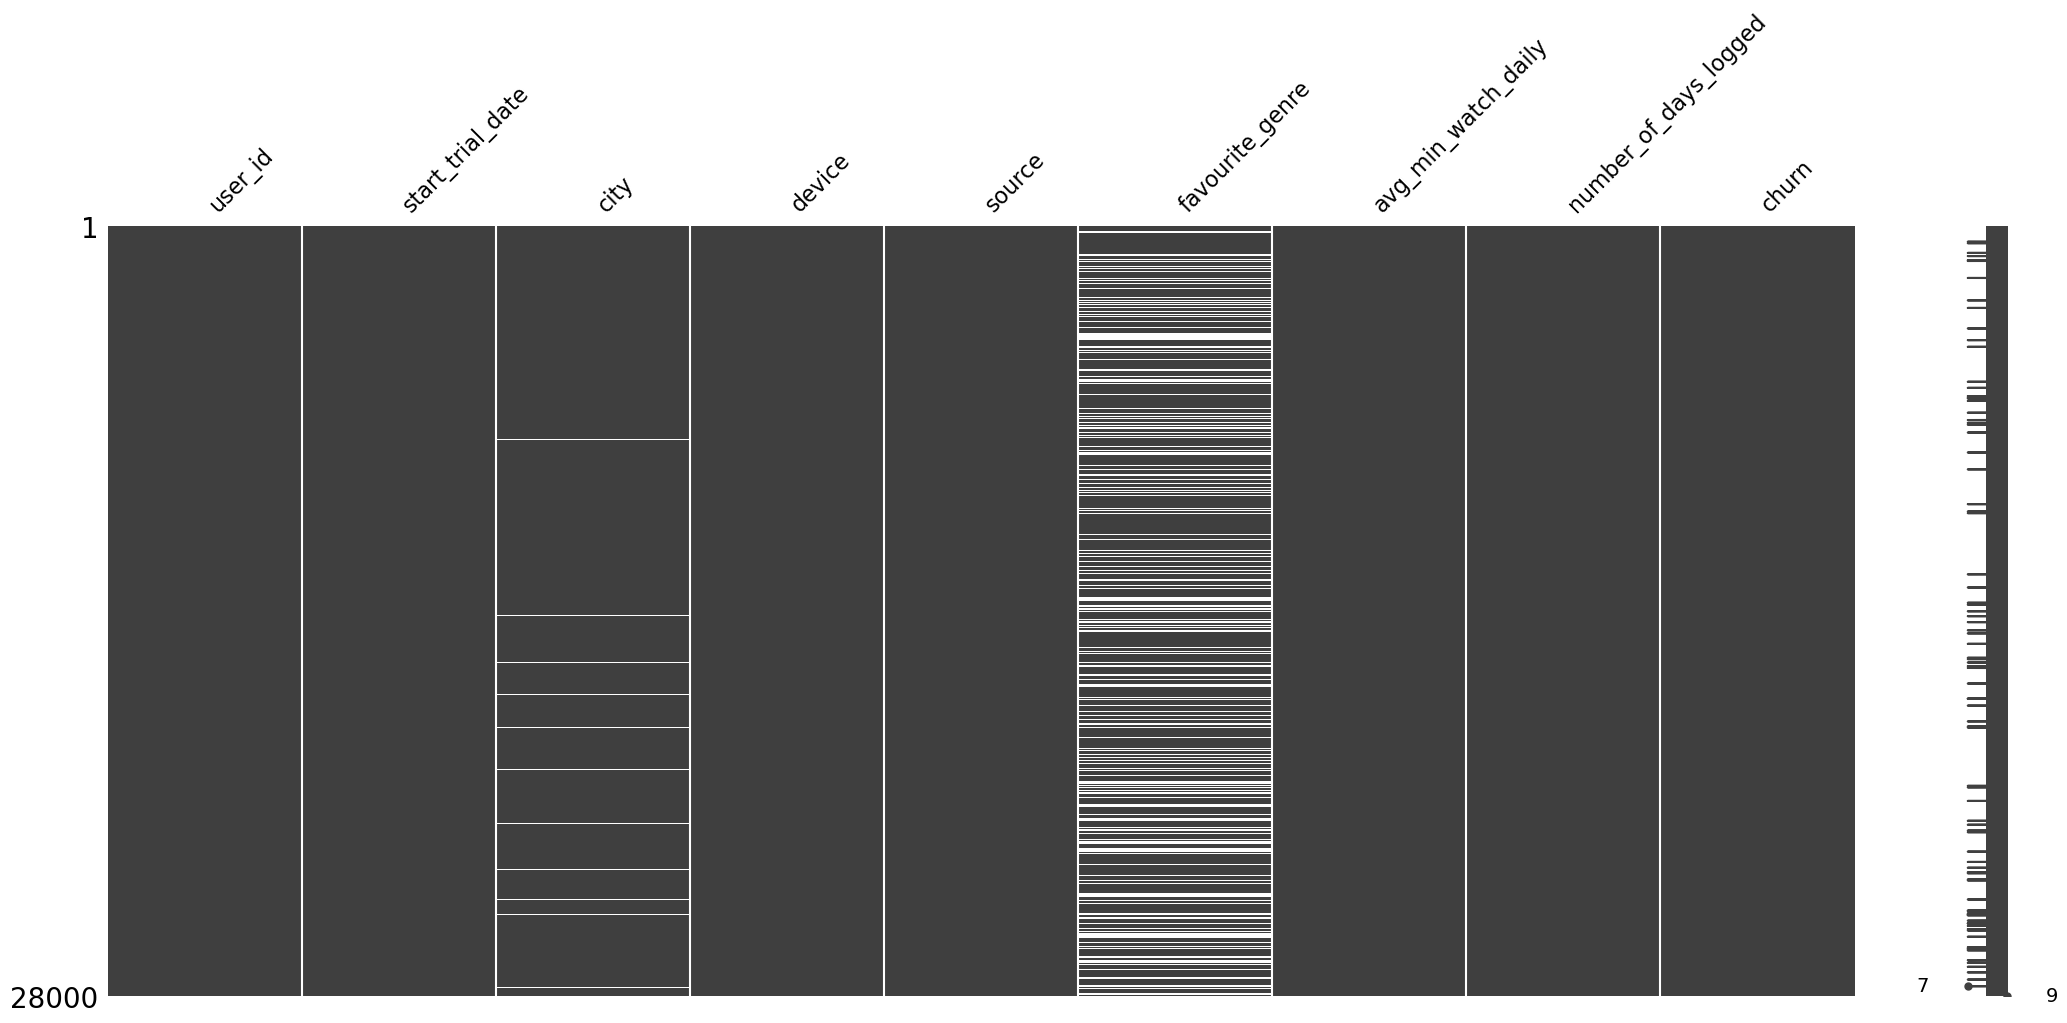

In [13]:
msno.matrix(df)

In [14]:
missing_summary = pd.DataFrame({
    'Количество': df.isna().sum(),
    'Доля, %': (df.isna().sum() / len(df)) * 100
})

display(missing_summary)

,Количество,"Доля, %"
user_id,0,0.0
start_trial_date,0,0.0
city,308,1.1
device,0,0.0
source,0,0.0
favourite_genre,7952,28.4
avg_min_watch_daily,0,0.0
number_of_days_logged,0,0.0
churn,0,0.0


Так как данные по городу и по жанру значимы, то для дльанейшей корректной кодировки заменим их на значения None

In [16]:
df['city'] = df['city'].fillna('None')
df['favourite_genre'] = df['favourite_genre'].fillna('None')

### Статистика столбцов

In [18]:
print("========= Статистика по числовым колонкам ========")
display(df.describe())
print("====== Статистика по колонкам типа 'object' ======")
display(df.describe(include='object'))

========= Статистика по числовым колонкам ========


,start_trial_date,avg_min_watch_daily,number_of_days_logged,churn
count,28000,28000.000000,28000.00000,28000.000000
mean,2024-02-14 09:20:34.285714176,7.812663,1.88600,0.789286
min,2024-02-01 00:00:00,0.000181,1.00000,0.000000
25%,2024-02-07 00:00:00,2.521966,1.00000,1.000000
50%,2024-02-14 00:00:00,5.419012,1.00000,1.000000
75%,2024-02-21 00:00:00,10.487946,2.00000,1.000000
max,2024-02-28 00:00:00,80.072401,7.00000,1.000000
std,NaN,7.739760,1.48293,0.407823


====== Статистика по колонкам типа 'object' ======


,user_id,city,device,source,favourite_genre
count,28000,28000,28000,28000,28000
unique,28000,10,4,3,6
top,d1b6ef34-1991-452a-8c39-c83c0d5805fe,Moscow,web,performance,None
freq,1,8736,17752,14540,7952


### Значения в категориальных столбцах

In [20]:
print('\n === Значения в столбце "city" === ')
display(df.city.unique())
print('\n === Значения в столбце "device" === ')
display(df.device.unique())
print('\n === Значения в столбце "source" === ')
display(df.source.unique())
print('\n === Значения в столбце "favourite_genre" === ')
display(df.favourite_genre.unique())


 === Значения в столбце "city" === 


array(['St Petersburg', 'Other', 'Ufa', 'Moscow', 'Samara', 'Krasnodar',
       'Yekaterinburg', 'Novosibirsk', 'Voronezh', 'None'], dtype=object)


 === Значения в столбце "device" === 


array(['ios', 'web', 'smarttv', 'android'], dtype=object)


 === Значения в столбце "source" === 


array(['performance', 'seo', 'organic'], dtype=object)


 === Значения в столбце "favourite_genre" === 


array(['drama', 'criminal', 'thriller', 'comedy', 'None', 'action'],
      dtype=object)

### Вывод

> **Анализ датасета:**  
> - размер датасета - 8 столбцов и 28000 строк  
> - данные в формате `object`, `float64`, `int64`, привели `start_trial_date` к формату `datetime`
> - дубликатов по строкам или по ID нет
> - есть пропуски в `city` - 308 и в `favourite_genre` - 7952, которые заменены на 'None' для дальнейшей корректной кодировки
> 
> **Анализ столбцов:**  
> - данные представлены в промежутке с `01.02.2024` по `28.02.2024`
> - `avg_min_watch_daily` в промежутке от 0.000181 до 80.072401 минут, медиана 7.8 минут и среднее 5.4 отличнаются, что может говорить о выбросах
> - `number_of_days_logged` от 1 до 7 дней, срденее - 1, медиана - 1.88, Что означает, что длительность триального периода вероятно - 7 дней, и большинство логируются только менее 2 дней
> - показатель отсутсвия покупки подписки `churn` - среднее 0.78, что говорит о 78% тех, кто не купил подписку после траильного периода
> - в `city` всего 10 значений: 'St Petersburg', 'Other', 'Ufa', 'Moscow', 'Samara', 'Krasnodar',
       'Yekaterinburg', 'Novosibirsk', 'Voronezh', 'None', самое популярное  - 'Moscow'
> - в `device` всего 4 значения: 'ios', 'web', 'smarttv', 'android', самое популярное  - 'web'
> - в `source` всего 3 значения: 'performance', 'seo', 'organic', самое популярное  - 'performance'
> - в `favourite_genre` всего 6 значений: 'drama', 'criminal', 'thriller', 'comedy', 'None', 'action', самое популярное - 'None'

## EDA

### Кодировка

Для всех категориальных столбцов применим метод One-Hot Encoding, так как это создавст новые столбцы с признаками, но при этом не будет значений 0, 1, 2... как в Label Encoding, что может привести к ошибки ML модели, так как наши данные равнозначны между собой, в отличие от, напрмиер категорий возраста

In [26]:
df_encoded = pd.get_dummies(
    df, columns=[
        'city',
        'device',
        'source',
        'favourite_genre'
    ], drop_first=False)

df_encoded = df_encoded.rename(columns={
    'city_Moscow': 'c_msk',
    'city_St Petersburg': 'c_spb', 
    'city_Novosibirsk': 'c_nsk',
    'city_Yekaterinburg': 'c_ekb',
    'city_Krasnodar': 'c_krd',
    'city_Samara': 'c_sam',
    'city_Voronezh': 'c_vrn',
    'city_Ufa': 'c_ufa',
    'city_Other': 'c_other',
    'city_None': 'c_none', 
    'device_web': 'd_web',
    'device_ios': 'd_ios',
    'device_android': 'd_android',
    'device_smarttv': 'd_smarttv',
    'source_performance': 's_perf',
    'source_organic': 's_org',
    'source_seo': 's_seo',
    'favourite_genre_drama': 'fg_drama',
    'favourite_genre_criminal': 'fg_criminal',
    'favourite_genre_thriller': 'fg_thriller',
    'favourite_genre_comedy': 'fg_comedy',
    'favourite_genre_action': 'fg_action',
    'favourite_genre_None': 'fg_none'
})

df = df_encoded.join(df[['city', 'device', 'source', 'favourite_genre']])

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
df.sample(10)

,user_id,start_trial_date,avg_min_watch_daily,number_of_days_logged,churn,c_krd,c_msk,c_none,c_nsk,c_other,c_sam,c_spb,c_ufa,c_vrn,c_ekb,d_android,d_ios,d_smarttv,d_web,s_org,s_perf,s_seo,fg_none,fg_action,fg_comedy,fg_criminal,fg_drama,fg_thriller,city,device,source,favourite_genre
6795,c4ecc5fe-1b16-472c-a102-03fcdd86e14d,2024-02-07,7.375348,2,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,Samara,web,performance,drama
20385,8c9841ac-0ecc-4a3a-b754-defbeb9f1e1a,2024-02-21,12.946620,1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,Samara,web,performance,thriller
21789,9e547e11-2125-46a3-9577-752b4a26f785,2024-02-22,0.082462,1,1,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,Yekaterinburg,android,performance,drama
16760,57077a11-afc8-4b38-ba6e-99bd8ece64ec,2024-02-17,4.978089,1,1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,St Petersburg,web,performance,thriller
27306,5a74b4cb-1a9a-4c32-924c-e2cdff845e4f,2024-02-28,12.232294,1,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,Other,smarttv,performance,thriller
8004,cd618ffe-2afb-422a-a284-4a64042b402e,2024-02-08,9.710244,2,0,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,St Petersburg,web,performance,thriller
13562,1d326991-ec66-4f13-9e93-65f50359c7b5,2024-02-14,5.620607,2,1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,Ufa,web,organic,drama
23191,79a6eecb-43d6-4274-b8f9-35765a18faa4,2024-02-24,2.301324,2,1,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,Moscow,web,performance,None
13701,21771f4f-116c-4f1c-8591-7942d7e40821,2024-02-14,7.130872,1,1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,Ufa,web,organic,None
2623,cf970a4b-1b60-452c-a717-90fa4a9e6a3e,2024-02-03,2.983675,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,Moscow,ios,seo,comedy


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                28000 non-null  object        
 1   start_trial_date       28000 non-null  datetime64[ns]
 2   avg_min_watch_daily    28000 non-null  float64       
 3   number_of_days_logged  28000 non-null  int64         
 4   churn                  28000 non-null  int64         
 5   c_krd                  28000 non-null  bool          
 6   c_msk                  28000 non-null  bool          
 7   c_none                 28000 non-null  bool          
 8   c_nsk                  28000 non-null  bool          
 9   c_other                28000 non-null  bool          
 10  c_sam                  28000 non-null  bool          
 11  c_spb                  28000 non-null  bool          
 12  c_ufa                  28000 non-null  bool          
 13  c

> выполнили кодировку, переименовали столбцы для лучшей читаемости

### Оценка корреляции

interval columns not set, guessing: ['avg_min_watch_daily', 'number_of_days_logged', 'churn']


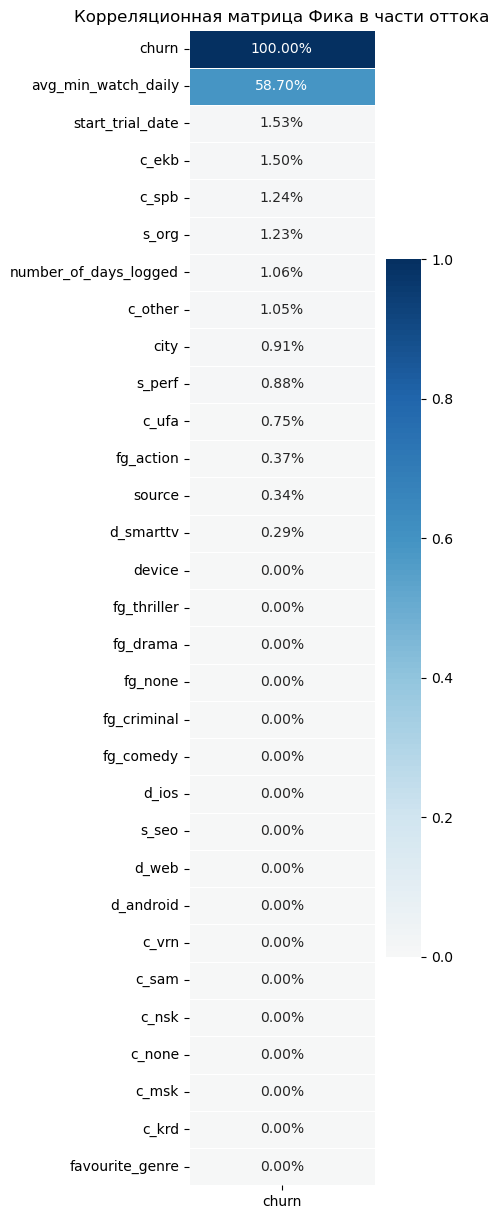

In [32]:
phik_corr_matrix = df.drop(columns='user_id').phik_matrix()
churn_phik_corr = phik_corr_matrix[['churn']].sort_values(by='churn', ascending=False)
plt.figure(figsize=(3, 15))
sns.heatmap(churn_phik_corr, annot=True, cmap='RdBu', center=0, fmt='.2%', linewidths=0.5)
plt.title('Корреляционная матрица Фика в части оттока')
plt.show()

> на первый взгляд значимая корреляция прослеживается только с колонкой `avg_min_watch_daily`

### Исследование данных в колонках

#### `avg_min_watch_daily`

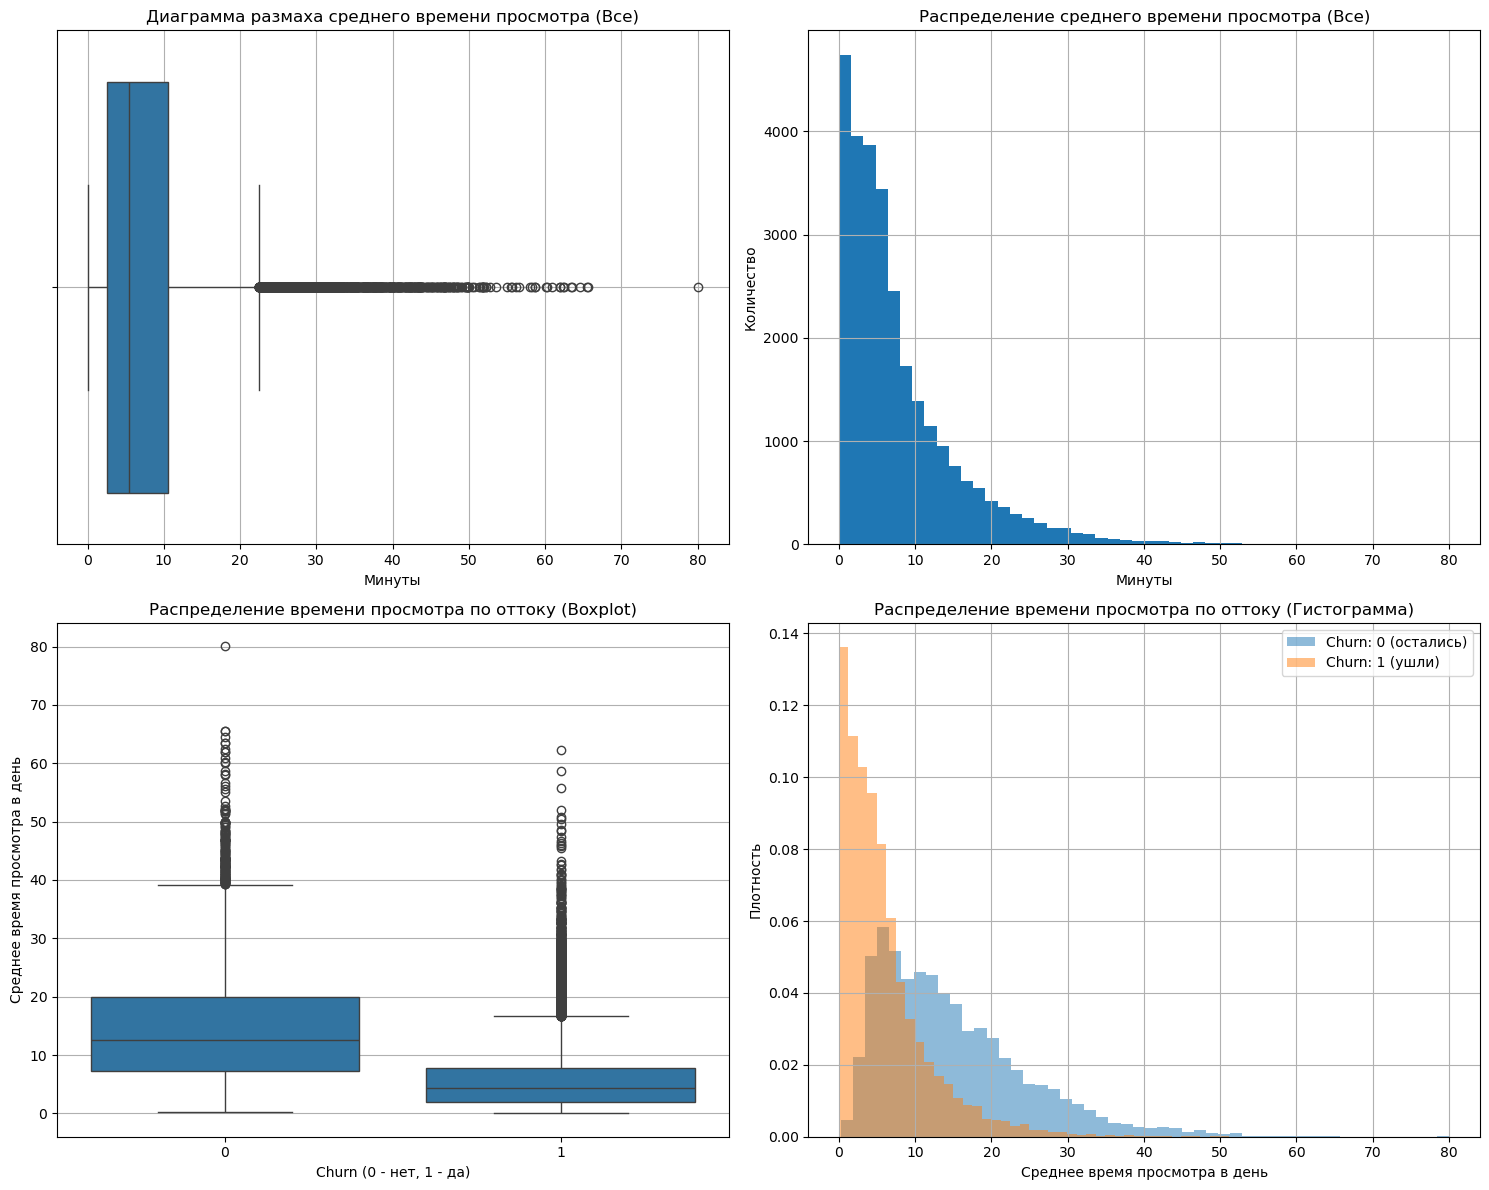

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), gridspec_kw={'width_ratios': [1, 1]}) 

ax1 = axes[0, 0]  # Верхний левый
ax2 = axes[0, 1]  # Верхний правый
ax3 = axes[1, 0]  # Нижний левый
ax4 = axes[1, 1]  # Нижний правый

# 1. boxplot: ОБЩЕЕ распределение avg_min_watch_daily (без учета churn)
sns.boxplot(x=df['avg_min_watch_daily'], ax=ax1) # Используем ax1
ax1.set_title('Диаграмма размаха среднего времени просмотра (Все)')
ax1.set_xlabel('Минуты')
ax1.set_ylabel('') # Ящик с усами по умолчанию использует Y для размаха, X для значений
ax1.grid(True)

# 2. Гистограмма: ОБЩЕЕ распределение avg_min_watch_daily (без учета churn)
ax2.hist(df['avg_min_watch_daily'], bins=50)
ax2.set_title('Распределение среднего времени просмотра (Все)')
ax2.set_xlabel('Минуты')
ax2.set_ylabel('Количество')
ax2.grid(True)

# 3. boxplot: avg_min_watch_daily в разрезе churn
sns.boxplot(data=df, x='churn', y='avg_min_watch_daily', ax=ax3) # Используем ax3
ax3.set_title('Распределение времени просмотра по оттоку (Boxplot)')
ax3.set_xlabel('Churn (0 - нет, 1 - да)')
ax3.set_ylabel('Среднее время просмотра в день')
ax3.grid(True, axis='y')

# 4. Гистограмма: avg_min_watch_daily в разрезе churn (наложение)
churn_0_data = df[df['churn'] == 0]['avg_min_watch_daily']
churn_1_data = df[df['churn'] == 1]['avg_min_watch_daily']

ax4.hist(churn_0_data, bins=50, alpha=0.5, label='Churn: 0 (остались)', density=True)
ax4.hist(churn_1_data, bins=50, alpha=0.5, label='Churn: 1 (ушли)', density=True)
ax4.set_title('Распределение времени просмотра по оттоку (Гистограмма)')
ax4.set_xlabel('Среднее время просмотра в день')
ax4.set_ylabel('Плотность')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

> видим что у отточной категории медиана среднего времени просомтра в 2 раза меньше в сравнении с теми, кто купил подсписку - 5 минут  
> среди тех, у кого среднее время более 8 минуты большинство купили подписку

#### `number_of_days_logged`

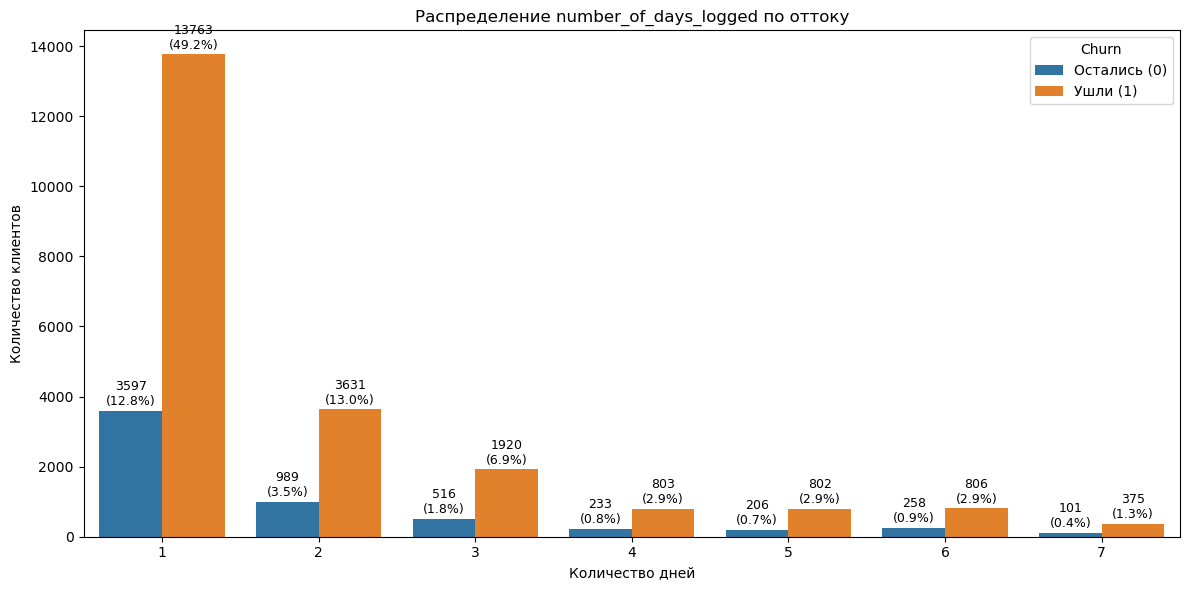

In [39]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='number_of_days_logged', hue='churn', data=df)

plt.title('Распределение number_of_days_logged по оттоку')
plt.xlabel('Количество дней')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn', labels=['Остались (0)', 'Ушли (1)']) 

# Добавляем аннотации (значения и проценты)
# Общее количество строк для расчета общего процента
total_count = len(df)

# Проходим по всем патчам (столбцам)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Не аннотируем пустые столбцы
        percentage = (height / total_count) * 100
        ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 2), textcoords='offset points', fontsize=9)

plt.tight_layout() 
plt.show()

> наибольша активность выявлена на этапе первых дней, однако нельзя однозначно сказать, что количество дней влияет на отток

#### `start_trial_date`

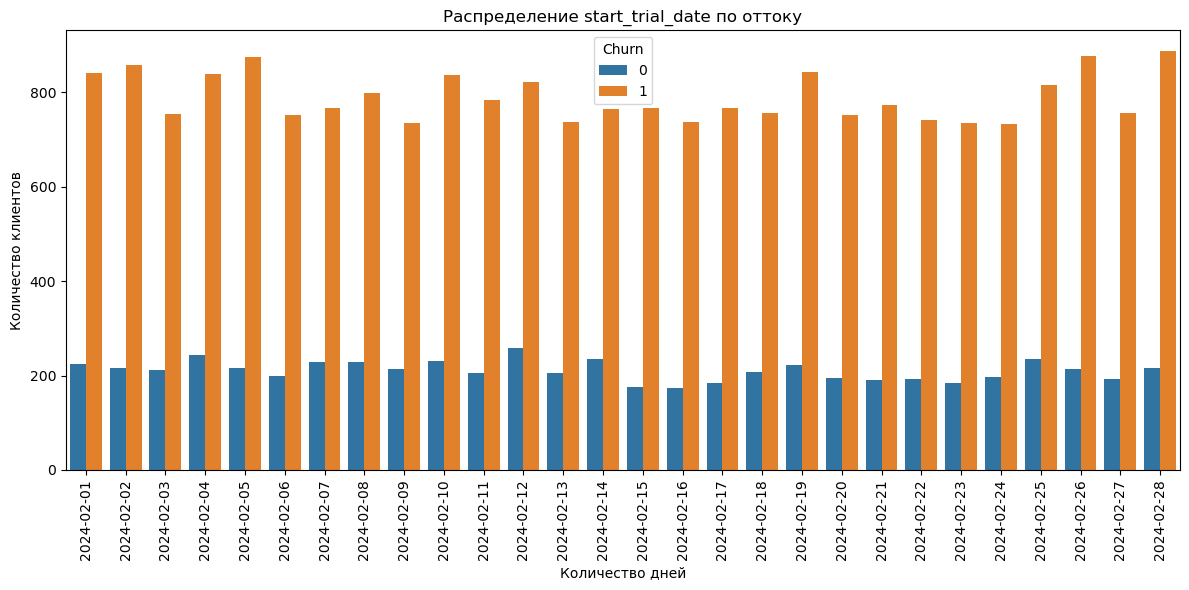

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='start_trial_date', hue='churn', data=df)

plt.title('Распределение start_trial_date по оттоку')
plt.xlabel('Количество дней')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

> влияние даты начала на триальный период не выявлено, активность по дня примерно равномерная с небольшими вспелексами в выходные

#### `city`

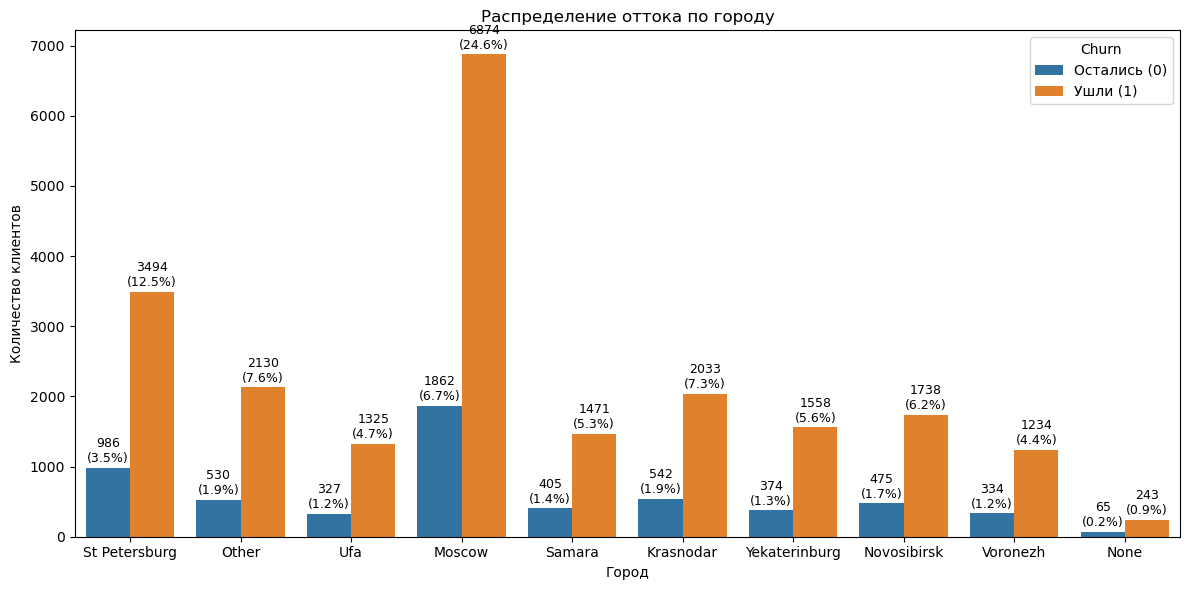

In [45]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='city', hue='churn', data=df)

plt.title('Распределение оттока по городу')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn', labels=['Остались (0)', 'Ушли (1)']) 

# Общее количество строк для расчета общего процента
total_count = len(df)

# Проходим по всем патчам (столбцам)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Не аннотируем пустые столбцы
        percentage = (height / total_count) * 100
        ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 2), textcoords='offset points', fontsize=9)

plt.tight_layout() 
plt.show()

> на первый взгляд влияение города незначительно на отток, однако Москва и СПБ - самые большие когорты клиентов

#### `device`

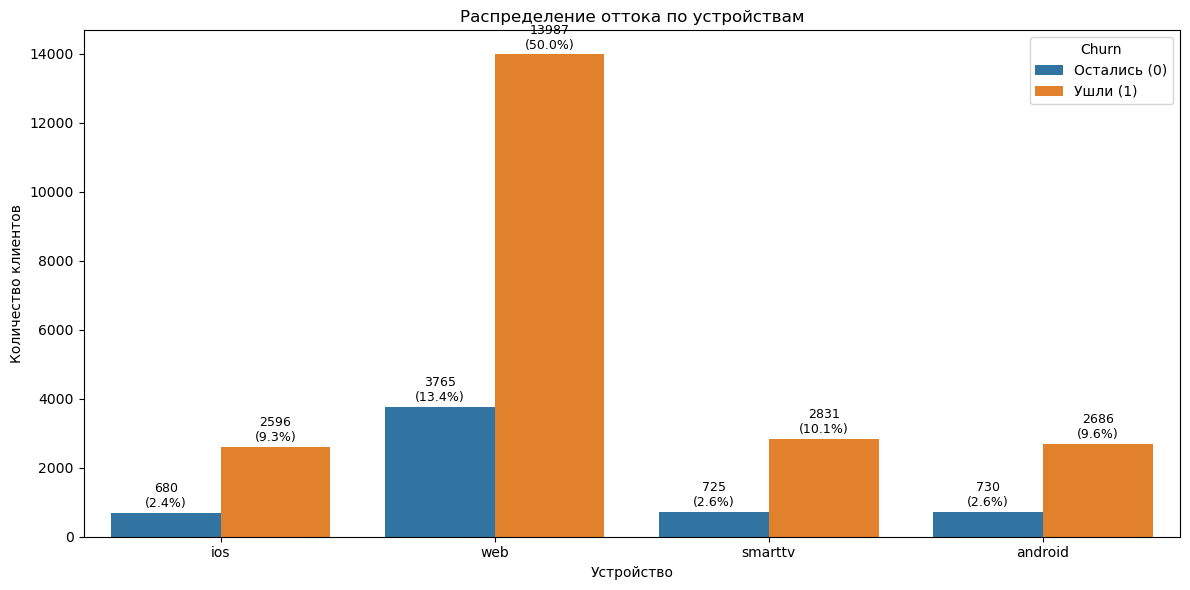

In [48]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='device', hue='churn', data=df)

plt.title('Распределение оттока по устройствам')
plt.xlabel('Устройство')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn', labels=['Остались (0)', 'Ушли (1)']) 

total_count = len(df)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        percentage = (height / total_count) * 100
        ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 2), textcoords='offset points', fontsize=9)

plt.tight_layout() 
plt.show()

> визуально влияние устройства и оттока не проследивается, но большая часть - это web

#### `source`	

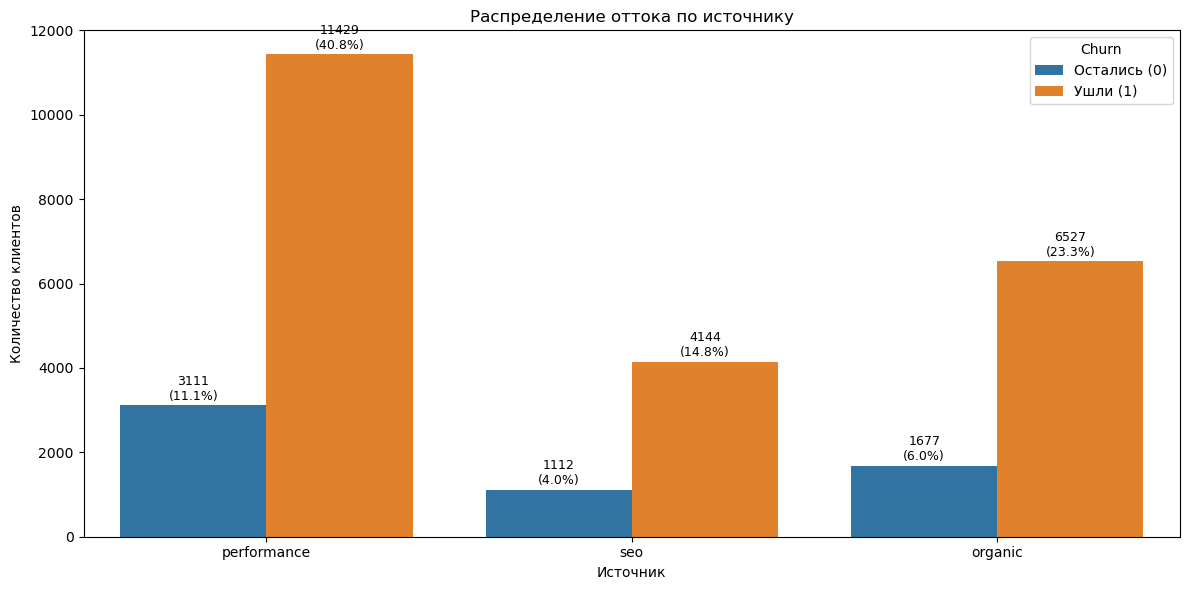

In [51]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='source', hue='churn', data=df)

plt.title('Распределение оттока по источнику')
plt.xlabel('Источник')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn', labels=['Остались (0)', 'Ушли (1)']) 

total_count = len(df)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        percentage = (height / total_count) * 100
        ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 2), textcoords='offset points', fontsize=9)

plt.tight_layout() 
plt.show()

> влияние истоника на отток не прослеживается

#### `favourite_genre`

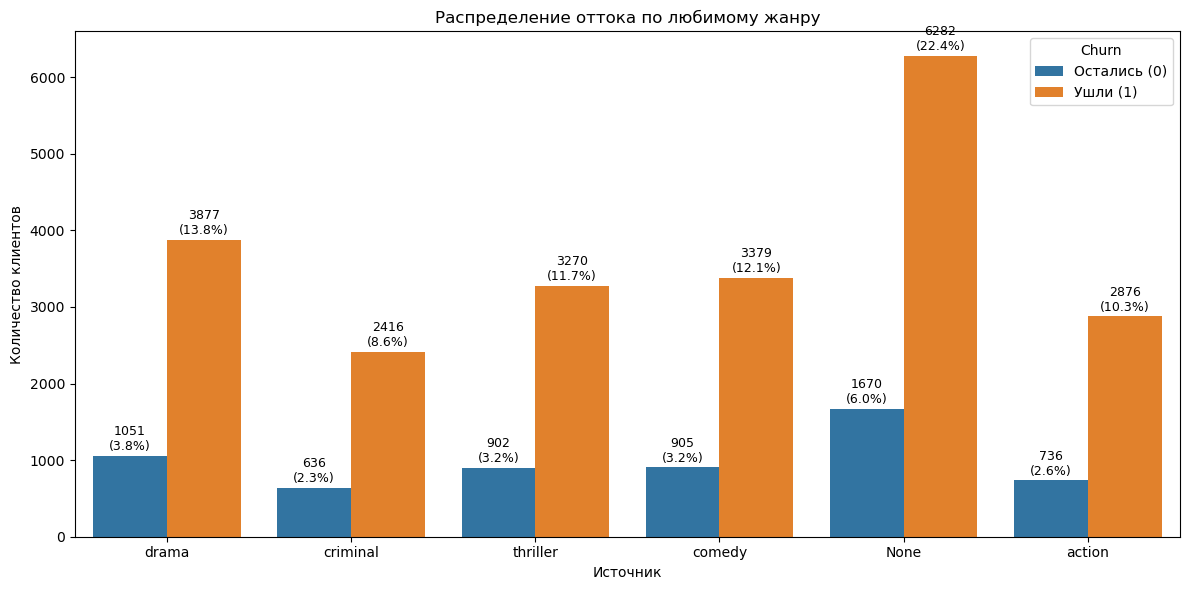

In [54]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='favourite_genre', hue='churn', data=df)

plt.title('Распределение оттока по любимому жанру')
plt.xlabel('Источник')
plt.ylabel('Количество клиентов')
plt.legend(title='Churn', labels=['Остались (0)', 'Ушли (1)']) 

total_count = len(df)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        percentage = (height / total_count) * 100
        ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 2), textcoords='offset points', fontsize=9)

plt.tight_layout() 
plt.show()

> - визуально можно отследить, что среди тех кто не указал любимый жанр - наибольшая категория оттока
> - при этом стоит также оценить корреляцию неуказания жанра и времени проведённого на сервисе, возможно человек ушёл, даже не успев воспользоваться, изучим это в след пункте

#### Дополнительная оценка корреляции

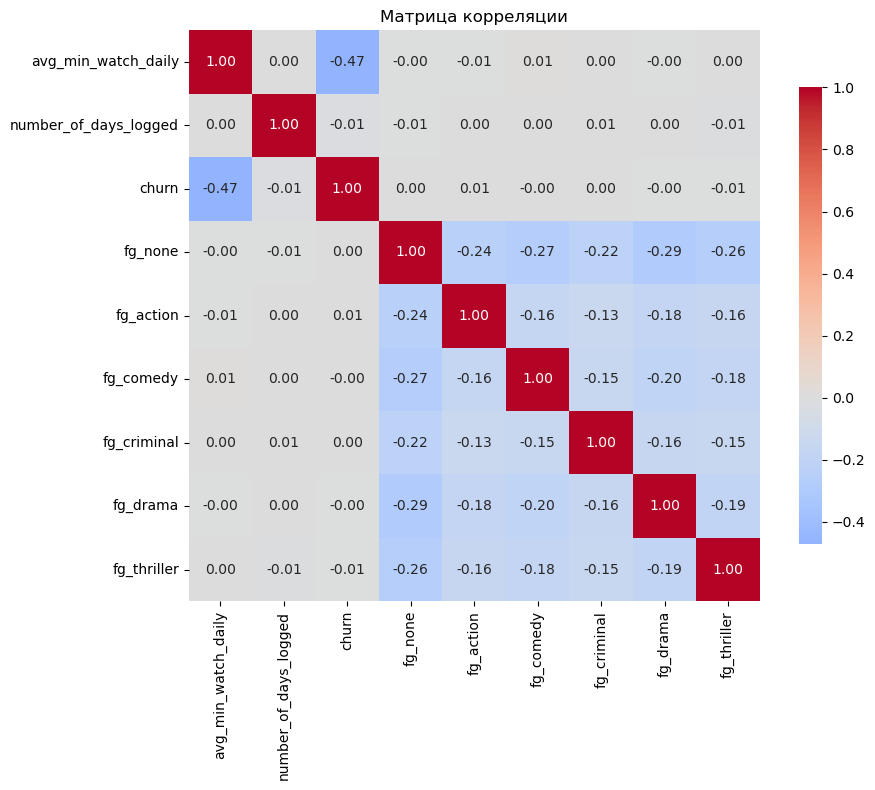

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедитесь, что названия столбцов соответствуют вашему датафрейму
columns_to_correlate = [
    'avg_min_watch_daily',
    'number_of_days_logged',
    'churn',
    'fg_none', 
    'fg_action',
    'fg_comedy',
    'fg_criminal',
    'fg_drama',
    'fg_thriller'
]

# Создаем подмножество DataFrame
df_subset = df[columns_to_correlate]

# Рассчитываем матрицу корреляции
correlation_matrix = df_subset.corr()

# Визуализируем
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

> нет, всё же значимой корреляции между неуказанием жанра и временем проведённым на сервисе не удаётся найти

## Feature Engineering

In [60]:
import pandas as pd

# активен более 1 дня
df['is_active_more_than_1day'] = (df['number_of_days_logged'] > 1).astype(int)

# уровень активности (например, 1 день, 2-3 дня, 4-7 дней)
def categorize_activity(days):
    if days == 1:
        return '1'
    elif 2 <= days <= 3:
        return '2-3'
    elif 4 <= days <= 7:
        return '4-7'
    else:
        return '>7'
df['activity_level'] = df['number_of_days_logged'].apply(categorize_activity)

# плотность просмотра (суммарное время) 
df['total_watch_time'] = df['avg_min_watch_daily'] * df['number_of_days_logged']

# день недели начала пробного периода
df['trial_start_day_of_week'] = pd.to_datetime(df['start_trial_date']).dt.dayofweek

# бинарный признак для дня недели (например, выходной)
df['is_weekend'] = df['trial_start_day_of_week'].isin([6, 7]).astype(int)

# просмотр новых признаков
display(df[['is_active_more_than_1day', 'activity_level', 'total_watch_time', 'trial_start_day_of_week', 'is_weekend']].sample(10))

,is_active_more_than_1day,activity_level,total_watch_time,trial_start_day_of_week,is_weekend
3218,0,1,2.413082,6,1
3664,0,1,3.895340,6,1
7316,0,1,6.179746,3,0
1367,1,2-3,48.961129,4,0
18523,0,1,6.045814,0,0
648,0,1,1.506921,3,0
17468,0,1,15.239169,6,1
20915,1,4-7,82.922840,2,0
26225,1,2-3,36.763048,1,0
23747,0,1,47.519645,5,0


## Гипотезы

### Влияние `avg_min_watch_daily` на отток

- **Гипотеза H0**: Среднее значение avg_min_watch_daily одинаково для пользователей, которые ушли и остались (отток не зависит от времени просмотра).
- **Гипотеза H1**: Среднее значение avg_min_watch_daily различается для пользователей, которые ушли и остались.

**Тест:** Тест Стьюдента для независимых выборок (если данные нормально распределены и дисперсии равны) или U-тест Манна-Уитни (непараметрический тест, не требует предположений о нормальности).

In [64]:
# Разделяем данные на группы
churn_0_data = df[df['churn'] == 0]['avg_min_watch_daily']
churn_1_data = df[df['churn'] == 1]['avg_min_watch_daily']

# Проверяем гипотезу с помощью U-теста Манна-Уитни
stat, p_value = mannwhitneyu(churn_0_data, churn_1_data, alternative='two-sided') # two-sided для проверки любых различий

print(f"U-тест Манна-Уитни для avg_min_watch_daily:")
print(f"Статистика теста: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05 # Уровень значимости
if p_value < alpha:
    print(f"p-value < {alpha}. Отклоняем H0. Среднее время просмотра статистически значимо различается между ушедшими и оставшимися.")
    print("✅ Гипотеза подтверждена: avg_min_watch_daily влияет на отток.\n")
else:
    print(f"p-value >= {alpha}. Не отвергаем H0. Нет статистически значимых доказательств различия среднего времени просмотра.")
    print("❌ Гипотеза не подтверждена: avg_min_watch_daily не влияет на отток.\n")

U-тест Манна-Уитни для avg_min_watch_daily:
Статистика теста: 106794652.0000
p-value: 0.0000
p-value < 0.05. Отклоняем H0. Среднее время просмотра статистически значимо различается между ушедшими и оставшимися.
✅ Гипотеза подтверждена: avg_min_watch_daily влияет на отток.



### Влияние `city` на отток

- **Гипотеза H0:** Распределение churn одинаково для всех городов (отток не зависит от города).
- **Гипотеза H1:** Распределение churn различается хотя бы для одного города.

**Тест:** Хи-квадрат Пирсона для таблицы сопряженности.

In [66]:
# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['city'], df['churn'])

print("Таблица сопряженности (city x churn):")
display(contingency_table)
print("-" * 30)

# Проверяем гипотезу с помощью хи-квадрат теста
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Хи-квадрат тест для city:")
print(f"Статистика теста (χ²): {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")
# print("Ожидаемые частоты:") # Можно раскомментировать, чтобы посмотреть
# print(expected)

alpha = 0.05
if p_value < alpha:
    print(f"p-value < {alpha}. Отклоняем H0. Распределение оттока статистически значимо различается в зависимости от города.")
    print("✅ Гипотеза подтверждена: город влияет на отток.\n")
else:
    print(f"p-value >= {alpha}. Не отвергаем H0. Нет статистически значимых доказательств влияния города на отток.")
    print("❌ Гипотеза не подтверждена: город не влияет на отток.\n")

Таблица сопряженности (city x churn):


churn,0,1
city,,
Krasnodar,542,2033
Moscow,1862,6874
None,65,243
Novosibirsk,475,1738
Other,530,2130
Samara,405,1471
St Petersburg,986,3494
Ufa,327,1325
Voronezh,334,1234


------------------------------
Хи-квадрат тест для city:
Статистика теста (χ²): 10.3672
p-value: 0.3216
Степени свободы: 9
p-value >= 0.05. Не отвергаем H0. Нет статистически значимых доказательств влияния города на отток.
❌ Гипотеза не подтверждена: город не влияет на отток.



### Влияние `favourite_genre` на отток
- **Гипотеза H0:** Распределение churn одинаково для всех жанров (отток не зависит от любимого жанра).
- **Гипотеза H1:** Распределение churn различается хотя бы для одного жанра.

**Тест:** Хи-квадрат Пирсона для таблицы сопряженности. Используем столбец favourite_genre, в котором заменили NaN на 'None'.

In [68]:
# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['favourite_genre'], df['churn'])

print("Таблица сопряженности (favourite_genre x churn):")
display(contingency_table)
print("-" * 30)

# Проверяем гипотезу с помощью хи-квадрат теста
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Хи-квадрат тест для favourite_genre:")
print(f"Статистика теста (χ²): {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")

alpha = 0.05
if p_value < alpha:
    print(f"p-value < {alpha}. Отклоняем H0. Распределение оттока статистически значимо различается в зависимости от любимого жанра.")
    print("✅ Гипотеза подтверждена: favourite_genre влияет на отток.\n")
else:
    print(f"p-value >= {alpha}. Не отвергаем H0. Нет статистически значимых доказательств влияния любимого жанра на отток.")
    print("❌ Гипотеза не подтверждена: favourite_genre не влияет на отток.\n")

Таблица сопряженности (favourite_genre x churn):


churn,0,1
favourite_genre,,
None,1670,6282
action,736,2876
comedy,905,3379
criminal,636,2416
drama,1051,3877
thriller,902,3270


------------------------------
Хи-квадрат тест для favourite_genre:
Статистика теста (χ²): 2.1287
p-value: 0.8311
Степени свободы: 5
p-value >= 0.05. Не отвергаем H0. Нет статистически значимых доказательств влияния любимого жанра на отток.
❌ Гипотеза не подтверждена: favourite_genre не влияет на отток.



### Влияние source на отток

- **Гипотеза H0:** Распределение churn одинаково для всех источников (отток не зависит от источника).  
- **Гипотеза H1:** Распределение churn различается хотя бы для одного источника.

**Тест:** Хи-квадрат Пирсона для таблицы сопряженности.

In [71]:
# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['source'], df['churn'])

print("Таблица сопряженности (source x churn):")
display(contingency_table)
print("-" * 30)

# Проверяем гипотезу с помощью хи-квадрат теста
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Хи-квадрат тест для source:")
print(f"Статистика теста (χ²): {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")

alpha = 0.05
if p_value < alpha:
    print(f"p-value < {alpha}. Отклоняем H0. Распределение оттока статистически значимо различается в зависимости от источника.")
    print("✅ Гипотеза подтверждена: source влияет на отток.\n")
else:
    print(f"p-value >= {alpha}. Не отвергаем H0. Нет статистически значимых доказательств влияния источника на отток.")
    print("❌ Гипотеза не подтверждена: source не влияет на отток.\n")

Таблица сопряженности (source x churn):


churn,0,1
source,,
organic,1677,6527
performance,3111,11429
seo,1112,4144


------------------------------
Хи-квадрат тест для source:
Статистика теста (χ²): 2.9038
p-value: 0.2341
Степени свободы: 2
p-value >= 0.05. Не отвергаем H0. Нет статистически значимых доказательств влияния источника на отток.
❌ Гипотеза не подтверждена: source не влияет на отток.

